# Python and Friends

This is a very quick run-through of some python syntax

In [70]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 800)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

##The Python Language

Lets talk about using Python as a calculator...

In [ ]:
1+2

Notice integer division and floating-point error below!

In [ ]:
1/2, 1.0/2.0, 3*3.2

Here is how we can print things. Something on the last line by itself is returned as the output value.

In [ ]:
print 1+3.0,"\n",5/3.0
5/3

## Python and Iteration (and files)

In working with python I always remember: a python is a duck.

What I mean is, python has a certain way of doing things. For example lets call one of these ways listiness. Listiness works on lists, dictionaries, files, and a general notion of something called an iterator.

But first, lets introduce the notion of a comprehension. Its a way of constructing a list

In [ ]:
alist=[1,2,3,4,5]
asquaredlist=[i*i for i in alist]
asquaredlist

Python has some nifty functions like `enumerate` and `zip`. The former gives a list of tuples with each tuple of the form `(index, value)`, while the latter takes elements from each list and outs them together into a tuple, thus creating a list of tuples. The first is a duck, but the second isnt.

In [52]:
enumerate(asquaredlist),zip(alist, asquaredlist)

(<enumerate at 0x7fe6c954ce10>, [(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)])

In [ ]:
[k for k in enumerate(asquaredlist)]

## Dictionaries

These are the bread and butter. You will use them a lot. They even duck like lists. But be careful how.

In [ ]:
adict={'one':1, 'two': 2, 'three': 3}
print [i for i in adict], [(k,v) for k,v in adict.items()], adict.values()

The keys do not have to be strings. From python 2.7 you can use dictionary comprehensions as well

In [ ]:
mydict ={k:v for (k,v) in zip(alist, asquaredlist)}
mydict

You can construct then nicely using the function `dict`.

In [ ]:
dict(a=1, b=2)

###and conversion to json

In [ ]:
import json

In [ ]:
s=json.dumps(mydict)
print s

In [ ]:
json.loads(s)

## Functions

Functions are even more the bread and butter. You'll see them as methods on objects, or standing alone by themselves.

In [ ]:
def square(x):
    return(x*x)
def cube(x):
    return x*x*x
square(5),cube(5)

In [ ]:
print square, type(cube)

In Python, functions are "first-class". This is just a fancy way of saying, you can pass functions to other functions

In [54]:
def sum_of_anything(x,y,f):
    print x,y,f
    return(f(x) + f(y))
sum_of_anything(3,4,square)

3 4 <function square at 0x7fe6cc399938>


25

## Booleans and Control-flow

Lets test for belonging...

In [ ]:
a=[1,2,3,4,5]
1 in a

In [ ]:
6 in a

Python supports if/elif/else clauses for multi-way conditionals

In [ ]:
def do_it(x):
    if x==1:
        print "One"
    elif x==2:
        print "Two"
    else:
        print x
do_it(1)

In [ ]:
do_it(2), do_it(3)

You can `break` out of a loop based on a condition. The loop below is a for loop.

In [ ]:
for i in range(10):
    print i
    if (i > 5):
        break

While loops are also supported. `continue` continues to the next iteration of the loop skipping all the code below, while `break` breaks out of it.

In [ ]:
i=0
while i < 10:
    print i
    i=i+1
    if i < 5:
        continue
    else:
        break


# Classes

Classes are a way of storing a set of functions that relate to a set of variables. For instance, let's say we want a class that does a series of functions specific to two numbers.

In [59]:
class MyClass:
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def add(self):
        return self.a+self.b
    
    def multiply(self):
        return self.a*self.b

In [60]:
class1 = MyClass(3,5)
class1.add()

8

# Reading Data

`Pandas` does a great job at reading CSV/tab-separated values files into tables and can perform functions on the rows of data.

In [64]:
import pandas as pd
dataset = pd.read_csv('testdata2.tsv',sep="\t")
dataset

,Course,2013,2020
0,Engineering and Applied Sciences,15,24.9
1,Social Sciences,26,33.1
2,Arts and Humanities,22,12.2
3,Sciences,37,29.8


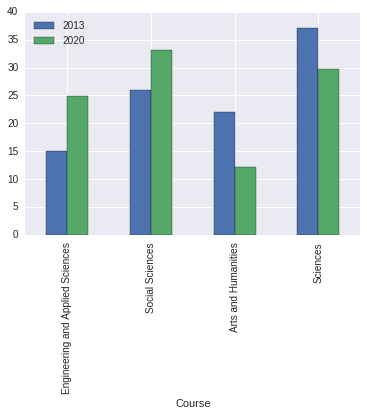

In [71]:
dataset.plot.bar(x=dataset["Course"])